In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_prices = pd.read_csv("../eng-dados/DATASET-PRICES.csv", sep='\t')
df_durations = pd.read_csv("../eng-dados/DATASET-DURATIONS.csv", sep='\t')

In [3]:
df_prices.head()

,ROUTE_ID,SUBDISTRICT_ID_ORIGIN,CITY_ORIGIN,SUBDISTRICT_ID_DESTINATION,CITY_DESTINATION,MODAL,SERVICE,PRICE,KM_CATEGORY,CAPTURE_TIME,IMAGE_ID
0,355030815000030355030815000057,355030815000030,CAMPO-BELO,355030815000057,CAMPO-BELO,ridesharing,99Pop,810,2.0,2020-08-02 03:18:21,./volume_sp/images/app/app_v0_R9XMC05G2VY_2.0_...
1,355030815000030355030815000057,355030815000030,CAMPO-BELO,355030815000057,CAMPO-BELO,ridesharing,99Comfort,1130,2.0,2020-08-02 03:18:21,./volume_sp/images/app/app_v0_R9XMC05G2VY_2.0_...
2,355030815000030355030815000057,355030815000030,CAMPO-BELO,355030815000057,CAMPO-BELO,ridesharing,99Pop,740,2.0,2020-08-02 04:18:22,./volume_sp/images/app/app_v0_R9XMC05G2VY_2.0_...
3,355030815000030355030815000057,355030815000030,CAMPO-BELO,355030815000057,CAMPO-BELO,ridesharing,99Comfort,1130,2.0,2020-08-02 04:18:22,./volume_sp/images/app/app_v0_R9XMC05G2VY_2.0_...
4,355030815000030355030815000057,355030815000030,CAMPO-BELO,355030815000057,CAMPO-BELO,ridesharing,99Pop,680,2.0,2020-08-02 05:17:27,./volume_sp/images/app/app_v0_R9XMC05G2VY_2.0_...


In [4]:
df_prices.dtypes

ROUTE_ID                       object
SUBDISTRICT_ID_ORIGIN           int64
CITY_ORIGIN                    object
SUBDISTRICT_ID_DESTINATION      int64
CITY_DESTINATION               object
MODAL                          object
SERVICE                        object
PRICE                           int64
KM_CATEGORY                   float64
CAPTURE_TIME                   object
IMAGE_ID                       object
dtype: object

In [5]:
df_durations.head()

,ROUTE_ID,SUBDISTRICT_ID_ORIGIN,CITY_ORIGIN,SUBDISTRICT_ID_DESTINATION,CITY_DESTINATION,MODAL,SERVICE,DURATION,KM_CATEGORY,CAPTURE_TIME,IMAGE_ID
0,355030815000030355030815000057,355030815000030,CAMPO-BELO,355030815000057,CAMPO-BELO,ridesharing,99Pop,9.0,2.0,2020-08-02 03:18:21,./volume_sp/images/app/app_v0_R9XMC05G2VY_2.0_...
1,355030815000030355030815000057,355030815000030,CAMPO-BELO,355030815000057,CAMPO-BELO,ridesharing,99Comfort,9.0,2.0,2020-08-02 03:18:21,./volume_sp/images/app/app_v0_R9XMC05G2VY_2.0_...
2,355030815000030355030815000057,355030815000030,CAMPO-BELO,355030815000057,CAMPO-BELO,ridesharing,99Pop,9.0,2.0,2020-08-02 04:18:22,./volume_sp/images/app/app_v0_R9XMC05G2VY_2.0_...
3,355030815000030355030815000057,355030815000030,CAMPO-BELO,355030815000057,CAMPO-BELO,ridesharing,99Comfort,9.0,2.0,2020-08-02 04:18:22,./volume_sp/images/app/app_v0_R9XMC05G2VY_2.0_...
4,355030815000030355030815000057,355030815000030,CAMPO-BELO,355030815000057,CAMPO-BELO,ridesharing,99Pop,10.0,2.0,2020-08-02 05:17:27,./volume_sp/images/app/app_v0_R9XMC05G2VY_2.0_...


In [6]:
df_durations.dtypes

ROUTE_ID                       object
SUBDISTRICT_ID_ORIGIN           int64
CITY_ORIGIN                    object
SUBDISTRICT_ID_DESTINATION      int64
CITY_DESTINATION               object
MODAL                          object
SERVICE                        object
DURATION                      float64
KM_CATEGORY                   float64
CAPTURE_TIME                   object
IMAGE_ID                       object
dtype: object

#  Converter preços em centavos para real

In [7]:
df_prices['PRICE'] = df_prices['PRICE'].apply(lambda x: x/100)

# Distribuição de Preços

# Verificar a variades de serviços Coletados

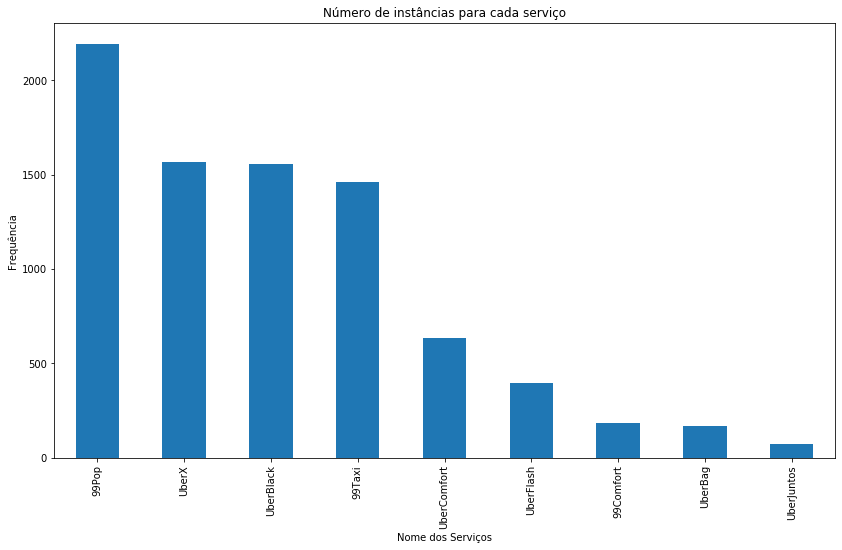

In [8]:
ax = df_prices['SERVICE'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Número de instâncias para cada serviço")
ax.set_xlabel("Nome dos Serviços");
ax.set_ylabel("Frequência");

# Verificar a variades de Categorias de KM Coletados

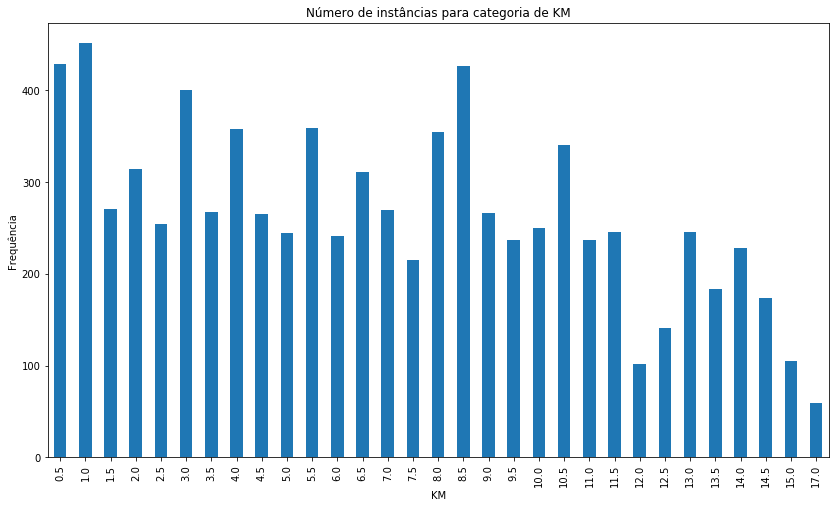

In [9]:
ax = df_prices['KM_CATEGORY'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Número de instâncias para categoria de KM")
ax.set_xlabel("KM");
ax.set_ylabel("Frequência");

# Existe alguma categoria de KM que não foi coletada na região ?

In [10]:
set(df_prices['KM_CATEGORY']) - set(np.arange (min(df_prices['KM_CATEGORY']), max(df_prices['KM_CATEGORY'])+1, 0.5))

set()

# Definir Categoria de KM em Curtas, Médias e Longas Distancias

In [11]:
km_curta_distances = [i for i in set(df_prices['KM_CATEGORY']) if i < 6]
km_media_distances = [i for i in set(df_prices['KM_CATEGORY']) if i > 6 and i < 11]
km_longa_distances = [i for i in set(df_prices['KM_CATEGORY']) if i > 11]

In [12]:
print(km_curta_distances)

[0.5, 1.5, 2.0, 3.5, 2.5, 4.0, 4.5, 3.0, 5.5, 5.0, 1.0]


In [13]:
print(km_media_distances)

[7.5, 6.5, 8.5, 10.5, 8.0, 10.0, 7.0, 9.0, 9.5]


In [14]:
print(km_longa_distances)

[12.5, 17.0, 12.0, 11.5, 14.0, 13.0, 14.5, 15.0, 13.5]


# Qual é a média de preços dos Serviços para Curtas, Médias e Longas Distancias ?

# Curta Distâncias

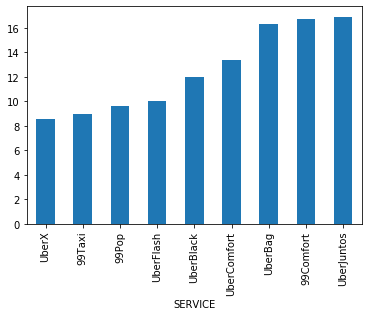

In [15]:
df_mean_prices_ser = df_prices[df_prices.KM_CATEGORY.isin(km_curta_distances)][['KM_CATEGORY', 'SERVICE', 'PRICE']].groupby('SERVICE').mean()
df_mean_prices_ser['PRICE'].sort_values().plot(kind='bar')

# Média Distâncias

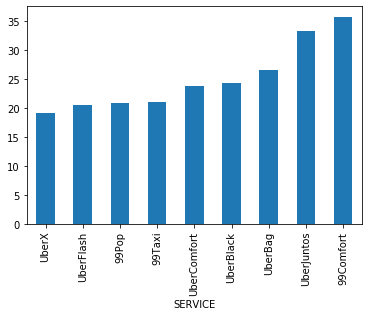

In [16]:
df_mean_prices_ser = df_prices[df_prices.KM_CATEGORY.isin(km_media_distances)][['KM_CATEGORY', 'SERVICE', 'PRICE']].groupby('SERVICE').mean()
df_mean_prices_ser['PRICE'].sort_values().plot(kind='bar')

# Longa Distâncias

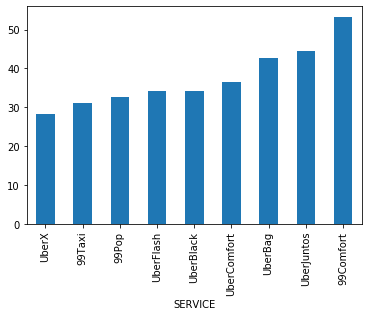

In [17]:
df_mean_prices_ser = df_prices[df_prices.KM_CATEGORY.isin(km_longa_distances)][['KM_CATEGORY', 'SERVICE', 'PRICE']].groupby('SERVICE').mean()
df_mean_prices_ser['PRICE'].sort_values().plot(kind='bar')

# Como é a distribuição de preços mínima e máxima para curtas, médias e longas distancias ?

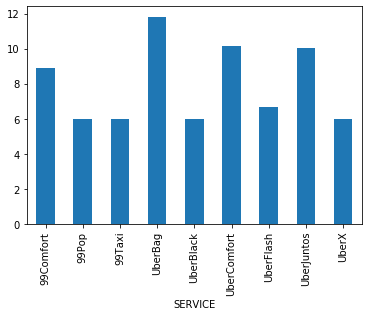

In [18]:
df_min_prices_ser = df_prices[df_prices.KM_CATEGORY.isin(km_curta_distances)][['KM_CATEGORY', 'SERVICE', 'PRICE']].groupby('SERVICE').min()
df_min_prices_ser['PRICE'].plot(kind='bar')

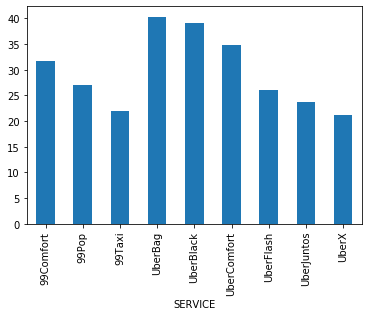

In [19]:
df_max_prices_ser = df_prices[df_prices.KM_CATEGORY.isin(km_curta_distances)][['KM_CATEGORY', 'SERVICE', 'PRICE']].groupby('SERVICE').max()
df_max_prices_ser['PRICE'].plot(kind='bar')

# Como é a distribuição de tempo de entrega mínima e máxima para curtas, médias e longas distancias ?

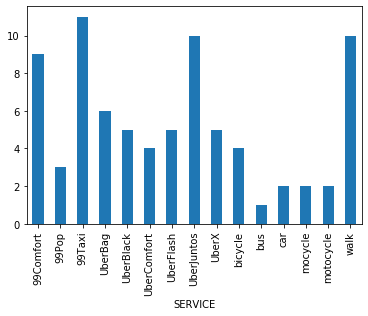

In [20]:
df_min_duration_ser = df_durations[df_durations.KM_CATEGORY.isin(km_curta_distances)][['KM_CATEGORY', 'SERVICE', 'DURATION']].groupby('SERVICE').min()
df_min_duration_ser['DURATION'].plot(kind='bar')

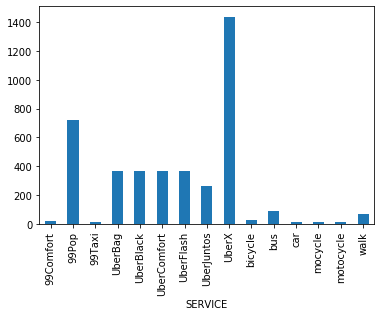

In [21]:
df_max_duration_ser = df_durations[df_durations.KM_CATEGORY.isin(km_curta_distances)][['KM_CATEGORY', 'SERVICE', 'DURATION']].groupby('SERVICE').max()
df_max_duration_ser['DURATION'].plot(kind='bar')

# Remover outliers com base na média das distâncias por km

In [22]:
def filter_data(df, type_c):
    km_categories = set(df.KM_CATEGORY)
    services = set(df.SERVICE)

    frames_filtered = []
    frames_erros = []

    df[type_c] = pd.to_numeric(df[type_c], errors='coerce')
    df = df.dropna()

    if type_c == "PRICE":
        df = df[(df['PRICE'].astype(int) < 10000)]

    for km in km_categories:
        for ser in services:
            df_stats = df.groupby(["KM_CATEGORY", "SERVICE"]).mean().reset_index()
            mu = float(df_stats[(df_stats.KM_CATEGORY==km)&(df_stats.SERVICE==ser)][type_c].mean())
            df_ser_filtered = df[(df.KM_CATEGORY==km)&(df.SERVICE==ser)&((df[type_c] < 2*mu)&(df[type_c] > mu/2))]
            df_ser_errors = df[(df.KM_CATEGORY==km)&(df.SERVICE==ser)&((df[type_c] > 2*mu)|(df[type_c] < mu/2))]

            frames_filtered.append(df_ser_filtered)
            frames_erros.append(df_ser_errors)

    df_good = pd.concat(frames_filtered)

    df_bad = pd.concat(frames_erros)
    return df_good

In [23]:
df_prices_filtered = filter_data(df_prices, 'PRICE')
df_durations_filtered = filter_data(df_durations, 'DURATION')

# Verificar novamente os preços máximas depois de remover os outliers

# Antes

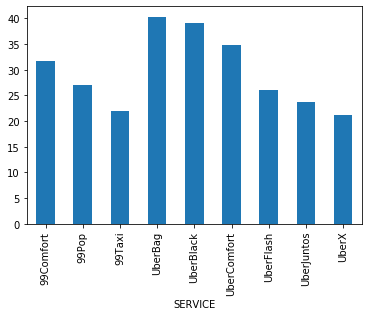

In [24]:
df_max_prices_ser = df_prices[df_prices.KM_CATEGORY.isin(km_curta_distances)][['KM_CATEGORY', 'SERVICE', 'PRICE']].groupby('SERVICE').max()
df_max_prices_ser['PRICE'].plot(kind='bar')

# Depois

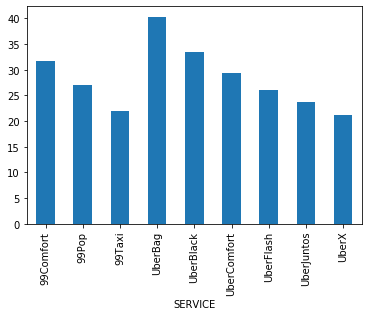

In [25]:
df_max_price_filtered = df_prices_filtered[df_prices_filtered.KM_CATEGORY.isin(km_curta_distances)][['KM_CATEGORY', 'SERVICE', 'PRICE']].groupby('SERVICE').max()
df_max_price_filtered['PRICE'].plot(kind='bar')

# Verificar novamente as durações máximas depois de remover os outliers

# Antes

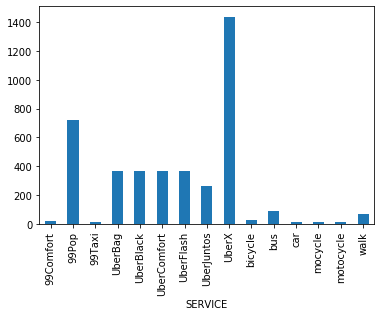

In [26]:
df_max_duration_ser = df_durations[df_durations.KM_CATEGORY.isin(km_curta_distances)][['KM_CATEGORY', 'SERVICE', 'DURATION']].groupby('SERVICE').max()
df_max_duration_ser['DURATION'].plot(kind='bar')

# Depois

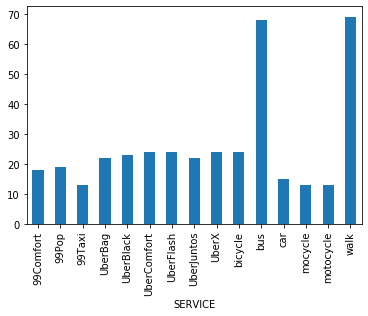

In [27]:
df_max_duration_filtered = df_durations_filtered[df_durations_filtered.KM_CATEGORY.isin(km_curta_distances)][['KM_CATEGORY', 'SERVICE', 'DURATION']].groupby('SERVICE').max()
df_max_duration_filtered['DURATION'].plot(kind='bar')

# Selecionar os serviços que são representativos para ser os preços da entrega

In [28]:
df_prices_filtered_ser = df_prices_filtered[df_prices_filtered.SERVICE.isin(['99Pop','99Taxi','UberFlash', 'UberX', 'UberJuntos'])]

In [29]:
df_durations_filtered.SERVICE = df_durations_filtered.SERVICE.apply(lambda x: 'motocycle' if x == 'mocycle' else x)

In [30]:
df_durations_a = df_durations_filtered[df_durations_filtered.SERVICE.isin(['99Pop','99Taxi','UberFlash', 'UberX', 'UberJuntos'])]
df_durations_a.loc[:,"SERVICE"] = "car"
                                                                                      
df_durations_b = df_durations_filtered[df_durations_filtered.SERVICE.isin(['car', 'motocycle', 'bicycle'])]
df_durations_filtered_ser = pd.concat([df_durations_a, df_durations_b])

/home/douglas/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
df_durations_aux = df_durations_filtered_ser[['SUBDISTRICT_ID_ORIGIN', 'CITY_ORIGIN', 'KM_CATEGORY', 'SERVICE','DURATION']]

In [32]:
df_durations_selected_aux = pd.pivot_table(df_durations_aux, values=['DURATION'], index=['SUBDISTRICT_ID_ORIGIN', 'KM_CATEGORY'],
                    columns=['SERVICE'], aggfunc={'DURATION': np.mean})

In [33]:
df_durations_selected_aux.columns = ['_'.join(col).upper() for col in df_durations_selected_aux.columns]

In [34]:
df_durations_selected_aux = df_durations_selected_aux.reset_index()

In [35]:
df_prices_selected = df_prices_filtered_ser[['SUBDISTRICT_ID_ORIGIN', 'CITY_ORIGIN', 'KM_CATEGORY', 'PRICE']]

In [36]:
df_prices_duration = df_prices_selected.merge(df_durations_selected_aux[['SUBDISTRICT_ID_ORIGIN','KM_CATEGORY', 'DURATION_BICYCLE','DURATION_CAR', 'DURATION_MOTOCYCLE']], on=['SUBDISTRICT_ID_ORIGIN','KM_CATEGORY'])

In [37]:
df_prices_duration = df_prices_duration.rename(columns={'PRICE':'TAX_PRICE', 'SUBDISTRICT_ID_ORIGIN':'SUBDISTRICT_ID'})

# Consolidar os dados por ponto de coleta e modal

In [38]:
df_prices_duration = df_prices_duration.groupby(['SUBDISTRICT_ID','KM_CATEGORY']).mean()
df_prices_duration = df_prices_duration.reset_index()
df_prices_duration = df_prices_duration.dropna()

In [39]:
df_prices_duration.columns

Index(['SUBDISTRICT_ID', 'KM_CATEGORY', 'TAX_PRICE', 'DURATION_BICYCLE',
       'DURATION_CAR', 'DURATION_MOTOCYCLE'],
      dtype='object')

In [40]:
df_prices_duration_car = df_prices_duration[['SUBDISTRICT_ID', 'KM_CATEGORY', 'TAX_PRICE', 'DURATION_CAR']].rename(columns={'DURATION_CAR':'DURATION'})
df_prices_duration_bike = df_prices_duration[['SUBDISTRICT_ID', 'KM_CATEGORY', 'TAX_PRICE', 'DURATION_BICYCLE']].rename(columns={'DURATION_BICYCLE':'DURATION'})
df_prices_duration_moto = df_prices_duration[['SUBDISTRICT_ID', 'KM_CATEGORY', 'TAX_PRICE', 'DURATION_MOTOCYCLE']].rename(columns={'DURATION_MOTOCYCLE':'DURATION'})

# Adicionar os custo de operação por modal

In [41]:
preco_car_popular = 25000
preco_moto_popular = 5000
preco_bike_popular = 1000
preco_combustivel = 4.5

In [42]:
preco_car_per_km = (((2*5*365*1)/11)*4.5)/(2*5*365*5) + (preco_car_popular*0.2)/(2*5*365*5) + (preco_car_popular*0.1)/(2*5*365*5)
preco_moto_per_km = (((2*5*365*1)/11)*4.5)/(2*5*365*5) + (preco_moto_popular*0.2)/(2*5*365*5) + (preco_moto_popular*0.1)/(2*5*365*5)
preco_bike_per_km =  (preco_bike_popular*0.2)/(2*5*365*5) + (preco_bike_popular*0.1)/(2*5*365*5)

In [43]:
preco_car_per_km

0.4927770859277708

In [44]:
preco_moto_per_km

0.16400996264009962

In [45]:
preco_bike_per_km

0.016438356164383564

10 Entregas de 5km ao dia durante 5 dias da semana por 1 ano (365 dias)  
carro popular 11 km por litro  
moto popular 50 km por litro  
combustivel 4.5

In [46]:
df_prices_duration_car["OPERATIONAL_COST"] = df_prices_duration_car['KM_CATEGORY'].apply(lambda x: preco_car_per_km*x)
df_prices_duration_moto["OPERATIONAL_COST"] = df_prices_duration_moto['KM_CATEGORY'].apply(lambda x: preco_moto_per_km*x)
df_prices_duration_bike["OPERATIONAL_COST"] = df_prices_duration_bike['KM_CATEGORY'].apply(lambda x: preco_bike_per_km*x)

# Datasets analisados e tratados

In [47]:
df_prices_duration_car.to_csv("TAXA_CAR.csv",sep='\t')
df_prices_duration_car.head()

,SUBDISTRICT_ID,KM_CATEGORY,TAX_PRICE,DURATION,OPERATIONAL_COST
0,355030815000030,2.0,7.312229,6.523810,0.985554
1,355030815000030,2.5,7.469388,8.170732,1.231943
2,355030815000030,3.0,8.408416,8.695652,1.478331
3,355030815000030,3.5,8.393926,9.793103,1.724720
4,355030815000030,4.0,12.246667,13.411765,1.971108


In [48]:
df_prices_duration_bike.to_csv("TAXA_BIKE.csv",sep='\t')
df_prices_duration_bike.head()

,SUBDISTRICT_ID,KM_CATEGORY,TAX_PRICE,DURATION,OPERATIONAL_COST
0,355030815000030,2.0,7.312229,5.000000,0.032877
1,355030815000030,2.5,7.469388,4.500000,0.041096
2,355030815000030,3.0,8.408416,6.333333,0.049315
3,355030815000030,3.5,8.393926,8.000000,0.057534
4,355030815000030,4.0,12.246667,10.800000,0.065753


In [49]:
df_prices_duration_moto.to_csv("TAXA_MOTO.csv",sep='\t')
df_prices_duration_moto.head()

,SUBDISTRICT_ID,KM_CATEGORY,TAX_PRICE,DURATION,OPERATIONAL_COST
0,355030815000030,2.0,7.312229,3.857143,0.328020
1,355030815000030,2.5,7.469388,5.111111,0.410025
2,355030815000030,3.0,8.408416,5.916667,0.492030
3,355030815000030,3.5,8.393926,6.117647,0.574035
4,355030815000030,4.0,12.246667,8.250000,0.656040


# Processar localizações para a visualização

In [53]:
df_locations = pd.read_csv('../eng-dados/volume_sp/data/locations.csv',sep='\t')

In [57]:
def convert_text2lnglat(text):
    text = str(text)
    text_list = text.split(',')
    text_list = [float(x) for x in text_list]
    return text_list

def convert_textlist2polygon(text):
    list_x = text.replace("],",";").replace("[","").replace("]","").replace(" ","").split(";")
    return [convert_text2lnglat(y) for y in list_x]

In [58]:
df_locations.SECTOR_CENTROID = df_locations.SECTOR_CENTROID.apply(lambda x: convert_textlist2polygon(x))

In [62]:
df_locations["LONGITUDE"] = df_locations.SECTOR_CENTROID.apply(lambda x: x[0][0])
df_locations["LATITUDE"] = df_locations.SECTOR_CENTROID.apply(lambda x: x[0][1])

In [64]:
df_locations.to_csv("LOCATIONS.csv",sep='\t')